Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE" and remove every line containing the expression: "raise ..." (if you leave such a line your code will not run).

Do not remove any cell from the notebook you downloaded. You can add any number of cells (and remove them if not more necessary).

Do not leave any variable initialized to None.

## IMPORTANT: make sure to rerun all the code from the beginning to obtain the results for the final version of your notebook, since this is the way we will do it before evaluating your notebook!!!

## Make sure to name your notebook file (.ipynb) correctly:
### - HW3_NL_NAMESURNAME_ID (E.g. : HW3_NL_MARIOROSSI_2204567)

## Fill in your name, surname and id number (numero matricola) below:

In [ ]:
NAME = "NIHAL SURI"
ID_number = int("2141819")

import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it."

---

## HOMEWORK #3

### Non linear models for classification

In this notebook we are going to explore the use of SVM and Neural Networks for image classification. We are going to use the famous MNIST dataset, that is a dataset of handwritten digits. We get the data from mldata.org, that is a public repository for machine learning data.

In [ ]:
# Load the required packages
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

np.random.seed(ID_number)

In [ ]:
#load the MNIST dataset
#Load data from https://www.openml.org/d/554
X,Y = fetch_openml('mnist_784', version=1, return_X_y=True,as_frame = False)

print(f'Each image is represented as vector of shape {X[0].shape}')
print(f'The image is represented in gray scale levels {X[0]}')
print(f'Here it is a label: {Y[0]}')

Each image is represented as vector of shape (784,)
The image is represented in gray scale levels [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0  

In [ ]:
# Let's normalize the features so that each value is between [0,1]
# Rescale the data
X = X / 255.

In a classification problem it is desirable to split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset.
We can achieve this by setting the “stratify” argument of the function "train_test_split" to the Y component of our dataset.

We are going to use 500 samples in the train dataset, the remaining ones are used for testing.

In [ ]:
from sklearn.model_selection import train_test_split

m_t = 500
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=m_t/len(Y), random_state=ID_number, stratify=Y)

print(f'Length train dataset: {len(y_train)}, Labels and frequencies: \n {list(zip(*np.unique(y_train, return_counts=True)))}')
print(f'Length test dataset: {len(y_test)}, Labels and frequencies: \n {list(zip(*np.unique(y_test, return_counts=True)))}')

Length train dataset: 500, Labels and frequencies: 
 [('0', 49), ('1', 56), ('2', 50), ('3', 51), ('4', 49), ('5', 45), ('6', 49), ('7', 52), ('8', 49), ('9', 50)]
Length test dataset: 69500, Labels and frequencies: 
 [('0', 6854), ('1', 7821), ('2', 6940), ('3', 7090), ('4', 6775), ('5', 6268), ('6', 6827), ('7', 7241), ('8', 6776), ('9', 6908)]


In [ ]:
# Function to plot a digit and print the corresponding label
def plot_digit(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28, 28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print(f"LABEL: {labels[index]}")
    return

INPUT:


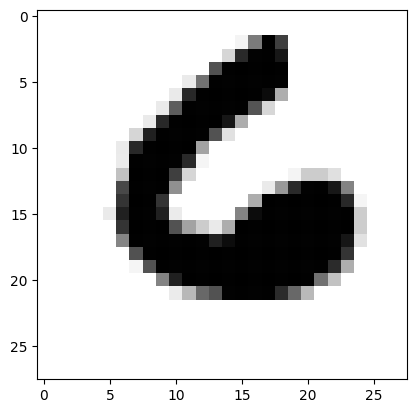

LABEL: 6
INPUT:


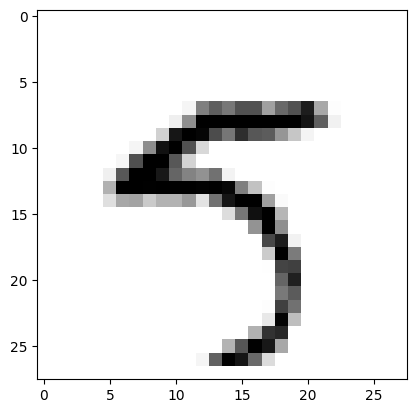

LABEL: 5


In [ ]:
#let's try the plotting function
plot_digit(x_train, y_train, 100)
plot_digit(x_test, y_test, 40000)

## TO DO 1
SVM with cross validation to pick the best model. Use SVC from sklearn.svm and GridSearchCV from sklearn.model_selection (5-fold cross-validation).

Print the best parameters found as well as the best score obtained by the 'optimal' model.
Choose the grid, depending on the kernel you are using different hyper-parameters are needed (C, gamma, ...).
You do not need to use more than 5 values for each hyper-parameter (otherwise the cell could be very slow).

In [ ]:
# import SVC
from sklearn.svm import SVC
# import for Cross-Validation
from sklearn.model_selection import GridSearchCV


def compute_best_SVM_with_CV(kernel_type : str, parameters : dict, x_train : np.ndarray, y_train : np.ndarray) -> tuple:
    '''
    Use Cross validation to find the best SVM on the given parameters. Return the best parameters set together with
    the corresponding score. Return also the scores for all the other parameters given as input.
    :param kernel_type: Type of kernel (i.e. linear, rbf, poly)
    :param parameters: Dict containing kernel parameters (e.g. {'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001], ...})
    :param x_train: Train dataset
    :param y_train: Train labels

    :returns: (best_param, best_score, all_scores)
        WHERE:
        best_param: best parameter set (this is a dictionary)
        best_score: best score obtained for the given parameters (float)
        all_scores: all scores computed for each parameter (np.ndarray)
    '''
    SVM_model = SVC(kernel=kernel_type)
    # Use GridSearchCV to find the best parameter set.
    # YOUR CODE HERE
    clf = GridSearchCV(SVM_model, parameters)
    clf.fit(x_train, y_train)

    print('#####################################')
    print(f'RESULTS for {kernel_type} KERNEL\n')
    # Store the best parameters set and print them
    print("Best parameters set found:")
    best_param = clf.best_params_
    # YOUR CODE HERE
    print(best_param)

    # Store and print the score of the best parameters set
    print("\nScore with best parameters:")
    best_score = clf.best_score_
    # YOUR CODE HERE
    print(best_score)


    # Store and print all the scores for the given parameters (average of the validation scores)
    print("\nAll scores on the grid:")
    all_scores = None
    # YOUR CODE HERE

    # Array of mean test score for all hyperparameter combinations
    all_scores = clf.cv_results_['mean_test_score']

    # # All parameter combinations
    # params = clf.cv_results_['params']

    # # Additionally done to see which hyper-parameter combination have what kind of score
    # for param, score in zip(params, all_scores):
    #     print(f"Parameters: {param}, Mean Validation Score: {score:.4f}")

    print(all_scores)

    return best_param, best_score, all_scores

# Choose the grid for parameters of the linear SVM kernel
linear_parameters = {
    'C': [0.1, 1, 10, 100, 1000]
}
# YOUR CODE HERE

best_param_lin, best_score_lin, all_scores_lin = compute_best_SVM_with_CV('linear', linear_parameters, x_train, y_train)
# Choose the grid for parameters of the rbf SVM kernel
rbf_parameters = {
    'C': [0.01, 0.1, 1, 10, 100, 1000] ,
    'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001]
}
# YOUR CODE HERE

best_param_rbf, best_score_rbf, all_scores_rbf = compute_best_SVM_with_CV('rbf', rbf_parameters, x_train, y_train)
# Choose the grid for parameters of the poly SVM kernel (do not forget to choose the degree)
poly_parameters = {
    'C': [0.1, 1, 10, 100, 1000], # regularization parameter (misclassification tolerance)
    'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001], # controls the influence of each individual training sample on the decision boundry
    'degree': [2, 3, 4], # degree of the polynomial
    # 'coef0' : [0, 1, 2, 3] # bias term that shifts the data up or down (only for poly: )
}
# YOUR CODE HERE

best_param_poly, best_score_poly, all_scores_poly = compute_best_SVM_with_CV('poly', poly_parameters, x_train, y_train)

#####################################
RESULTS for linear KERNEL

Best parameters set found:
{'C': 0.1}

Score with best parameters:
0.866

All scores on the grid:
[0.866 0.862 0.862 0.862 0.862]
#####################################
RESULTS for rbf KERNEL

Best parameters set found:
{'C': 10, 'gamma': 0.01}

Score with best parameters:
0.89

All scores on the grid:
[0.112 0.112 0.112 0.112 0.112 0.112 0.112 0.112 0.112 0.43  0.112 0.112
 0.112 0.112 0.616 0.888 0.676 0.112 0.112 0.112 0.632 0.89  0.864 0.69
 0.112 0.112 0.632 0.89  0.864 0.864 0.112 0.112 0.632 0.89  0.864 0.864]
#####################################
RESULTS for poly KERNEL

Best parameters set found:
{'C': 0.1, 'degree': 2, 'gamma': 10}

Score with best parameters:
0.8800000000000001

All scores on the grid:
[0.88  0.88  0.878 0.356 0.112 0.112 0.844 0.844 0.844 0.238 0.112 0.112
 0.794 0.794 0.794 0.196 0.112 0.112 0.88  0.88  0.88  0.842 0.112 0.112
 0.844 0.844 0.844 0.762 0.112 0.112 0.794 0.794 0.794 0.592 0.112 

In [ ]:
assert type(best_param_rbf) == dict
assert type(best_score_rbf) == np.float64
assert np.prod(np.array([len(params) for params in rbf_parameters.values()])) == len(all_scores_rbf)


In [ ]:
# TODO 2:
# Get training and test error for the best SVM model obtained from CV (you need to choose across different kernels
# too). You just need to look at the best model for each kernel and choose the best one (you can do this by hand).

best_kernel_type, best_parameters = 'rbf', {'C': 10, 'gamma': 0.01}
# YOUR CODE HERE
best_SVM = SVC(kernel=best_kernel_type, **best_parameters)
best_SVM.fit(x_train, y_train)

# Compute training and test error for this model (use the usual sklearn built-in functions)
training_error, test_error = 0.0, 0.0
# YOUR CODE HERE

training_error = 1 - best_SVM.score(x_train, y_train)
test_error = 1 - best_SVM.score(x_test, y_test)

print (f"Best SVM training error: {training_error}")
print (f"Best SVM test error: {test_error}")

Best SVM training error: 0.0
Best SVM test error: 0.1094964028776978


In [ ]:
assert type(training_error) == np.float64 or float
assert type(test_error) == np.float64 or float


### TO DO 3
Now we use feed-forward neural networks for classification.
In particular, we use the Multi-Layer-Perceptron (the multi-layer structure we have seen in class, see http://scikit-learn.org/stable/modules/neural_networks_supervised.html).

Similarly as before, we use cross validation (5-fold cross-validation) to pick the best model, you need to complete the function 'compute_best_MLP_with_CV()' that finds the best MLP architecture given a specific activation function.

Note that the starting random state is fixed to make the runs reproducible (random_state=ID_number).
The following options for the MLP are used: max_iter=1000, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID_number, learning_rate_init=.1, activation = activation_f.

In [ ]:
def compute_best_MLP_with_CV(activation_f : str, parameters : dict, x_train : np.ndarray, y_train : np.ndarray) -> tuple:
    '''
    Use Cross validation to find the best MLP architecture given a specific activation function.
    Return the best parameters set together with the corresponding score. Return also the scores for all the other parameters given as input.
    :param activation_f: Type of activation function (e.g. 'logistic', 'tanh', 'relu')
    :param parameters: architectures (e.g. {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,)]})
    :param x_train: Train dataset
    :param y_train: Train labels

    :returns: (best_param, best_score, all_scores)
        WHERE:
        best_param: best parameter set (this is a dictionary)
        best_score: best score obtained for the given parameters (float)
        all_scores: all scores computed for each parameter (np.ndarray)
    '''


    mlp = MLPClassifier(max_iter=1000, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID_number, learning_rate_init=.1,activation = activation_f)

    #Use GridSearchCV to find the various paramters the function returns: best_param, best_score, all_scores

    # YOUR CODE HERE
    clf = GridSearchCV(mlp, parameters)
    clf.fit(x_train, y_train)

    best_param = clf.best_params_
    best_score = clf.best_score_
    all_scores = clf.cv_results_['mean_test_score']

    return best_param, best_score, all_scores

In [ ]:
# test various architectures (hidden_layer_sizes) and activation functions (e.g. 'logistic','tanh','relu') for the MLP.

mlp_parameters = {} # leave here maximum 3 architectures when you submit

## FOR SUBMISSION
# mlp_parameters = {
#     'hidden_layer_sizes': [(100, 50), (50,), (100,)]
# }

# FOR TEST
mlp_parameters = {
    'hidden_layer_sizes': [ (50,), (10, 10), (50, 10)]
}


# next test different architectures and activation functions: use compute_best_MLP_with_CV()
# YOUR CODE HERE
activation_functions = ['logistic','tanh','relu']

for f in activation_functions:
    print(f"Activation Function: {f}")

    # call compute_best_MLP_with_CV()
    best_param, best_score, all_scores = compute_best_MLP_with_CV(
        f, mlp_parameters, x_train, y_train
    )

    # Results for current activation function
    print(f"Best Parameters for {f}: {best_param}")
    print(f"Best Score for {f}: {best_score}")
    print(f"All Scores for {f}: {all_scores}\n")

Activation Function: logistic
Best Parameters for logistic: {'hidden_layer_sizes': (50,)}
Best Score for logistic: 0.8699999999999999
All Scores for logistic: [0.87  0.776 0.828]

Activation Function: tanh
Best Parameters for tanh: {'hidden_layer_sizes': (50,)}
Best Score for tanh: 0.86
All Scores for tanh: [0.86  0.8   0.842]

Activation Function: relu
Best Parameters for relu: {'hidden_layer_sizes': (50,)}
Best Score for relu: 0.8639999999999999
All Scores for relu: [0.864 0.798 0.85 ]



In [ ]:
# simple autotest with relu
best_param_relu, best_score_relu, all_scores_relu = compute_best_MLP_with_CV('relu', mlp_parameters, x_train, y_train)

assert type(best_param_relu) == dict
assert type(best_score_relu) == np.float64 or float
assert np.prod(np.array([len(params) for params in mlp_parameters.values()])) == len(all_scores_relu)


In [ ]:
#Select the best activation function and architecture you found so that it can be used next

best_activation_type, mlp_best_param = 'logistic', {'hidden_layer_sizes': (50,) }
# YOUR CODE HERE


## TO DO 4


Now get training and test error for the NN with the best parameters from above. We use verbose=True
in input so to see how loss changes in iterations (see how this changes if the number of iterations is changed)

Iteration 1, loss = 2.31376508
Iteration 2, loss = 2.25649033
Iteration 3, loss = 2.21293435
Iteration 4, loss = 2.12865332
Iteration 5, loss = 2.03046481
Iteration 6, loss = 1.91523442
Iteration 7, loss = 1.77690605
Iteration 8, loss = 1.63341290
Iteration 9, loss = 1.47741418
Iteration 10, loss = 1.32394823
Iteration 11, loss = 1.18583951
Iteration 12, loss = 1.05350938
Iteration 13, loss = 0.93931572
Iteration 14, loss = 0.84583762
Iteration 15, loss = 0.75946635
Iteration 16, loss = 0.68748012
Iteration 17, loss = 0.62953928
Iteration 18, loss = 0.57989278
Iteration 19, loss = 0.53478940
Iteration 20, loss = 0.49950030
Iteration 21, loss = 0.46485219
Iteration 22, loss = 0.43674712
Iteration 23, loss = 0.40837666
Iteration 24, loss = 0.38724707
Iteration 25, loss = 0.36572947
Iteration 26, loss = 0.34670441
Iteration 27, loss = 0.32854598
Iteration 28, loss = 0.31308299
Iteration 29, loss = 0.29788510
Iteration 30, loss = 0.28387848
Iteration 31, loss = 0.27200839
Iteration 32, los

(Text(0.5, 0, 'Iter'), Text(0, 0.5, 'Loss'))

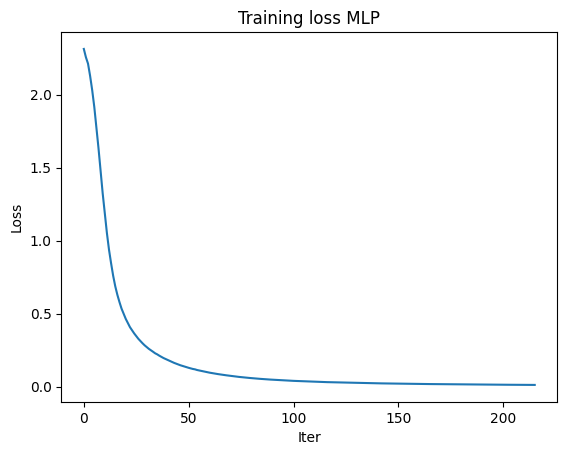

In [ ]:
# Get training and test error for the best NN model found using CV
max_iter = 1000
mlp = MLPClassifier(**mlp_best_param, max_iter=max_iter, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID_number,
                    learning_rate_init=.1,activation=best_activation_type, verbose=True)

# ADD CODE: FIT MODEL & COMPUTE TRAINING AND TEST ERRORS
training_error, test_error = 0, 0
# YOUR CODE HERE
mlp.fit(x_train, y_train)
training_error = 1 - mlp.score(x_train, y_train)
test_error = 1 - mlp.score(x_test, y_test)

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

plt.plot(mlp.loss_curve_, label='Training Loss')
plt.title('Training loss MLP')
plt.xlabel('Iter'), plt.ylabel('Loss')

In [ ]:
assert type(training_error) == np.float64 or float
assert type(test_error) == np.float64 or float


## TO DO  5
Write a function to find and plot the first digit (in x_test) that is missclassified by NN and correctly classified by SVM.

Write a function to compute the confusion matrix for the predictions of a model (on testset). If you are not familiar with what a confusion matrix is, have a look at this link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html . You are not allowed to use sklearn to create the confusion matrix BUT you can compare your solution with the sklearn implementation to check you wrote it right (see assert checks).

INPUT:


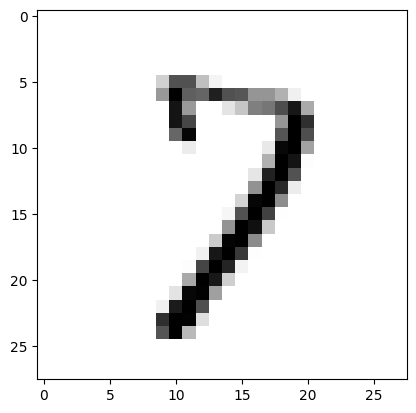

LABEL: 7
SVM confusion matrix: [[6473    0   21   23    4  141   97    6   67   22]
 [   0 7470   61  193    6   35   10   14   31    1]
 [ 114   76 6045  187   48   22  212   58  152   26]
 [  12   36  172 6184    2  351   34   69  138   92]
 [  10   36   93   14 5888    7  147   29   52  499]
 [  38   96   63  265   66 5422  106   23   55  134]
 [  54   35   54   16   25   96 6507    0   40    0]
 [  39   84  121   54  179   27    5 6468   14  250]
 [  60  106   83  527   63  274   39   99 5403  122]
 [  75   36   37   89  268   51   15  268   39 6030]]
MLP confusion matrix: [[6460    0   17   34   14  143   65   29   73   19]
 [   0 7373   80  124    5  150    6   25   55    3]
 [ 206   93 5695  187   89   40  249   78  267   36]
 [  36   34  233 5728    3  649   34   86  159  128]
 [  28   46   64   14 5548   11  220   20   38  786]
 [ 145   90  132  218  152 4977  112   84  164  194]
 [ 130   32   92    7   68  164 6232    0  102    0]
 [  60   93  189   56  188   49    5 6159   2

(Text(0.5, 1.0, 'SVM'), Text(0.5, 1.0, 'MLP'))

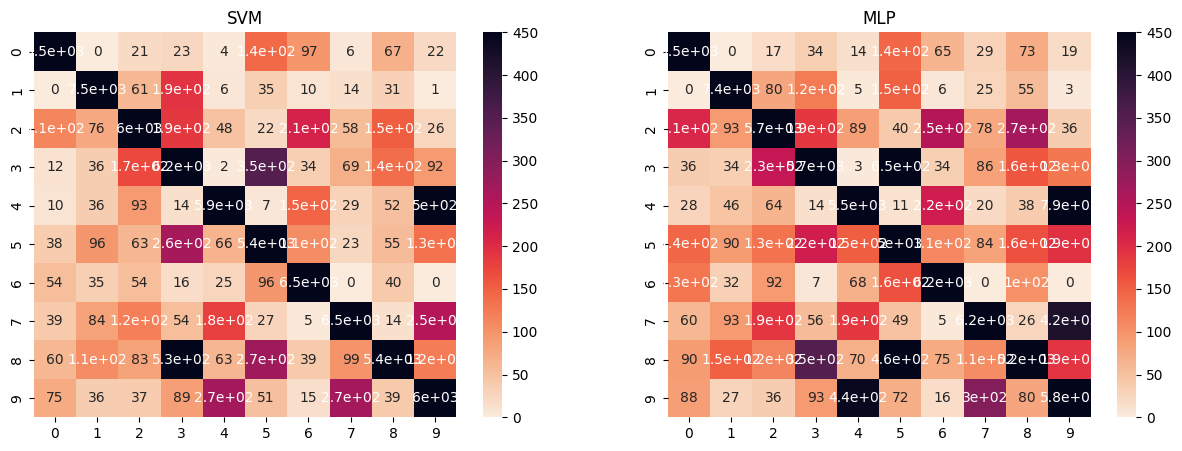

In [ ]:
def find_and_print_first_mismatched_prediction(SVM_prediction : np.ndarray, NN_prediction : np.ndarray,
                                               x_test : np.ndarray, y_test : np.ndarray) -> int:
    '''
    Function to find and plot (use 'plot_digit') the first digit that is missclassified by NN and correctly classified by SVM.
    :param SVM_prediction: SVM predictions.
    :param NN_prediction: MLP predictions.
    :param x_test: Test set inputs.
    :param y_test: Test set labels.

    :returns:
        i: returns the first index in which there is a mismatch between NN_prediction and true labels but no mismatch
           between SVM_prediction and true labels.
    '''
    i = 0
    found = False
    while ((not found) and (i<len(y_test))):
        # YOUR CODE HERE
        if((NN_prediction[i] != y_test[i]) and (SVM_prediction[i] == y_test[i])):
            found = True
        else:
            i += 1
    if found:
        plot_digit(x_test, y_test, i)
    else:
        print("No index found")
        i = -1 # if no mismatch is found between NN and SVM
    return i

def confusion_matrix_by_hand(true_labels : np.ndarray, predicted_labels : np.ndarray) -> np.ndarray:
    '''
    Function used to compute the confusion matrix given true and predicted labels.
    :param true_labels: True labels.
    :param predicted_labels: Predicted labels (note this function does not require to know which model generated
                             the predictions).

    :returns:
        confusion_matrix: Confusion matrix for the given true and predicted labels.
    '''
    labels = np.unique(true_labels)
    map_labels_to_index = {label:i for i, label in enumerate(labels)}
    confusion_matrix = np.zeros((len(labels), len(labels)))
    # YOUR CODE HERE

    # 10by10 confusion matrix

    for true_label, pred_label in zip(true_labels, predicted_labels):
        # get the indices from the labels
        true_label_index = map_labels_to_index[true_label]
        pred_label_index = map_labels_to_index[pred_label]

        # tally them up in the matrix
        confusion_matrix[true_label_index, pred_label_index] += 1

    return confusion_matrix.astype(int)

# predicted & true labels

# Let's test our functions
SVM_prediction = best_SVM.predict(x_test)
NN_prediction = mlp.predict(x_test)


first_index = find_and_print_first_mismatched_prediction(SVM_prediction, NN_prediction, x_test, y_test)

SVM_CM = confusion_matrix_by_hand(y_test, SVM_prediction)
MLP_CM = confusion_matrix_by_hand(y_test, NN_prediction)

print(f'SVM confusion matrix: {SVM_CM}')
print(f'MLP confusion matrix: {MLP_CM}')

# Convert confusion matrices to pandas data frames
labels = np.unique(y_test)
SVM_CM_df = pd.DataFrame(SVM_CM, index = labels, columns = labels)
MLP_CM_df = pd.DataFrame(MLP_CM, index = labels, columns = labels)

# Plot confusion matrices
fig, axes = plt.subplots(1,2, figsize=(15,5))
sn.heatmap(SVM_CM_df, annot=True, ax=axes[0], cmap='rocket_r', vmax=450)
sn.heatmap(MLP_CM_df, annot=True, ax=axes[1], cmap='rocket_r', vmax=450)
axes[0].set_title('SVM'), axes[1].set_title('MLP')

In [ ]:
from sklearn.metrics import confusion_matrix
skl_confusion_matrix_SVM = confusion_matrix(y_test, SVM_prediction)
skl_confusion_matrix_NN = confusion_matrix(y_test, NN_prediction)

assert np.sum(skl_confusion_matrix_SVM - SVM_CM) == 0
assert np.sum(skl_confusion_matrix_NN - MLP_CM) == 0


## TO DO 6: explain the results you got (max 5 lines)
According to the cross-validation results, would you choose SVMs or NNs when 500 data points are available for training? Is this a good choice, given the results on the test set?

Looking at the confusion matrices, what to do you observe? On which classes each model is more likely to make mistakes?

(Answer in the next cell, no need to add code)

YOUR ANSWER HERE

- When only **500 data points are available for training**, I would choose **SVM over NNs** as they're designed for low-data regimes. **Yes, it is a good choice in comparison to MLP when we compare the loss on the test set**. SVMs are able to generalize even when the dataset is small as they require only a few support vectors to represent the boundries between the classes The main issue that we face with MLPs is that they rely on gradient-based optimization which can lead to poor convergence with smaller datasets and larger datasets are required to truly leverage their power.  


- When we take a look at the confusion matrices, we can immediately say that **SVM has higher true positives (diagonal values) in comparison to MLP**, which is expected on the basis of the previous argument.


<div style="text-align: center;">

| **Class**      | **SVM Misclassifications** |   **MLP Misclassification** | **Model more likely to make mistakes**
| :---        |    :----:   |          :----: | ---: |
| **Class 3** | Class 5 (351), Class 2 (172) | Class 5 (661), Class 2 (239) | **MLP** |
| **Class 5** | Class 3 (265), Class 9 (134) | Class 3 (205), Class 4 (154) | **MLP** |
| **Class 8** | Class 3 (527), Class 5 (274) | Class 5 (416), Class 3 (328) | **MLP** |
| **Class 9** | Class 4 (268), Class 7 (268) | Class 4 (435), Class 7 (305) | **MLP** |

</div>

In summary MLP makes more missclassifications for each of the classes in compariosn to


## More Data

Now let's do the same but using more data points for training SVM and NN. For SVM we are going to use the best hyperparameters set (kernel, C, gamma, ...) found using 500 data points. For NN we are going to use the best architecture found using 500 data points for the relu kernel since such architecture is usually fast to train.

In [ ]:
# let's restart the random generator with the given seed
np.random.seed(ID_number)

m_t = 60000
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=m_t/len(Y), random_state=ID_number, stratify=Y)

print(f'Lenght train dataset: {len(y_train)}, Labels and frequencies: \n {list(zip(*np.unique(y_train, return_counts=True)))}')
print(f'Lenght test dataset: {len(y_test)}, Labels and frequencies: \n {list(zip(*np.unique(y_test, return_counts=True)))}')

Lenght train dataset: 60000, Labels and frequencies: 
 [('0', 5917), ('1', 6752), ('2', 5991), ('3', 6121), ('4', 5849), ('5', 5411), ('6', 5894), ('7', 6251), ('8', 5850), ('9', 5964)]
Lenght test dataset: 10000, Labels and frequencies: 
 [('0', 986), ('1', 1125), ('2', 999), ('3', 1020), ('4', 975), ('5', 902), ('6', 982), ('7', 1042), ('8', 975), ('9', 994)]


In [ ]:
# As we did with the first HW let's use a decorator to measure time
from collections import defaultdict
running_times = defaultdict(list)

def measure_time(function):
    def wrap(*args, **kw):
        import time
        t_start = time.time()
        result = function(*args, **kw)
        t_end = time.time()
        running_times[type(args[0]).__name__].append(t_end - t_start)
        return result
    return wrap

@measure_time
def fit_classification_model(model, x_train, y_train):
    model.fit(x_train, y_train)

In [ ]:
n_data = [250, 500, 1000, 2000, 5000, 7500, 9000, 11000, 13000, 15000]
svm_train_err, svm_test_err = [], []
mlp_train_err, mlp_test_err = [], []
for n in n_data:
    print(f'Processing with {n} data ...')
    # Initialize models according to the best we got using 500 data
    svm = SVC(kernel=best_kernel_type, **best_parameters)
    mlp = MLPClassifier(**best_param_relu, max_iter=max_iter, alpha=1e-4, solver='sgd', tol=1e-4,
                        random_state=ID_number, learning_rate_init=.1,activation='relu')

    # fit svc
    fit_classification_model(svm, x_train[:n], y_train[:n])
    # get svc train and test error
    svm_train_err.append(1. - svm.score(x_train[:n], y_train[:n]))
    svm_test_err.append(1. - svm.score(x_test, y_test))

    # fit mlp
    fit_classification_model(mlp, x_train[:n], y_train[:n])
    # get mlp train and test error
    mlp_train_err.append(1. - mlp.score(x_train[:n], y_train[:n]))
    mlp_test_err.append(1. - mlp.score(x_test, y_test))

Processing with 250 data ...
Processing with 500 data ...
Processing with 1000 data ...
Processing with 2000 data ...
Processing with 5000 data ...
Processing with 7500 data ...
Processing with 9000 data ...
Processing with 11000 data ...
Processing with 13000 data ...
Processing with 15000 data ...


In [ ]:
print(svm_test_err)

(<matplotlib.legend.Legend at 0x7b0d7fa4ac50>, Text(0.5, 1.0, 'Training Time'))

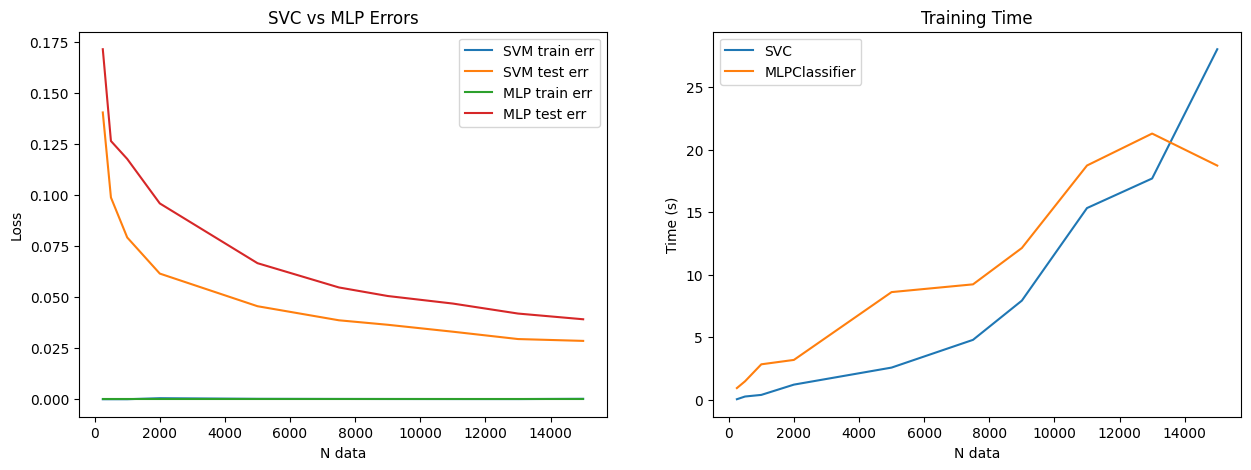

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))
axes[0].plot(n_data, np.array(svm_train_err), label='SVM train err')
axes[0].plot(n_data, np.array(svm_test_err), label='SVM test err')
axes[0].plot(n_data, np.array(mlp_train_err), label='MLP train err')
axes[0].plot(n_data, np.array(mlp_test_err), label='MLP test err')
axes[0].set_xlabel('N data'), axes[0].set_ylabel('Loss')
axes[0].legend(), axes[0].set_title('SVC vs MLP Errors')

for model, times in running_times.items():
    axes[1].plot(n_data, times, label=model)
axes[1].set_xlabel('N data'), axes[1].set_ylabel('Time (s)')
axes[1].legend(), axes[1].set_title('Training Time')

# TODO 7: Complete dataset
Just for comparison, since it may not be possible to learn a SVM on too many data (due to time and memory complexity issues as you can notice from the plots above), let's use logistic regression (with standard parameters from scikit-learn but the number of iteration).

In [ ]:
from sklearn import linear_model

# Fit and test a logistic regression model (same as HW1)
max_iter = 1000
log_reg = 0
training_error_lr, test_error_lr = 0, 0
# YOUR CODE HERE
log_reg = linear_model.LogisticRegression(C=1e5, max_iter=max_iter).fit(x_train, y_train)

training_error_lr = 1 - log_reg.score(x_train, y_train)
test_error_lr = 1 - log_reg.score(x_test, y_test)


print (f"Best logistic regression training error: {training_error_lr:.4f}")
print (f"Best logistic regression test error: {test_error_lr:.4f}")

Best logistic regression training error: 0.0583
Best logistic regression test error: 0.0783


We now learn the NN. Below we use the same best architecture as before (found with 500 data for the relu activation function), feel free to try larger ones (and to use again CV), or smaller ones if it takes too much time. (We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration).

*Note*: If you do again CV to choose the best architecture remember to save the best set of parameters into the variable: "best_param_relu".

In [ ]:
# get training and test error for the best NN model from CV
best_mlp_large = 0
training_error, test_error = 0, 0
# YOUR CODE HERE

best_param_relu = {'hidden_layer_sizes': (50,) }
best_mlp_large = MLPClassifier(**mlp_best_param, max_iter=max_iter, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID_number,
                    learning_rate_init=.1,activation='relu', verbose=True)
# train the model again
best_mlp_large.fit(x_train, y_train)
training_error = 1 - best_mlp_large.score(x_train, y_train)
test_error = 1 - best_mlp_large.score(x_test, y_test)

print ('\nRESULTS FOR BEST NN\n')

print (f"Best NN training error: {training_error:.4f}")
print (f"Best NN test error: {test_error:.4f}")

Iteration 1, loss = 0.31774071
Iteration 2, loss = 0.14956475
Iteration 3, loss = 0.10866097
Iteration 4, loss = 0.08931857
Iteration 5, loss = 0.07595878
Iteration 6, loss = 0.06603209
Iteration 7, loss = 0.05796108
Iteration 8, loss = 0.05280863
Iteration 9, loss = 0.04723508
Iteration 10, loss = 0.04271102
Iteration 11, loss = 0.03799491
Iteration 12, loss = 0.03573139
Iteration 13, loss = 0.03195731
Iteration 14, loss = 0.03026941
Iteration 15, loss = 0.02653366
Iteration 16, loss = 0.02483828
Iteration 17, loss = 0.02273784
Iteration 18, loss = 0.02013795
Iteration 19, loss = 0.01881507
Iteration 20, loss = 0.01773963
Iteration 21, loss = 0.01487313
Iteration 22, loss = 0.01304495
Iteration 23, loss = 0.01217833
Iteration 24, loss = 0.01166401
Iteration 25, loss = 0.01055207
Iteration 26, loss = 0.01017935
Iteration 27, loss = 0.00857939
Iteration 28, loss = 0.00834371
Iteration 29, loss = 0.00717386
Iteration 30, loss = 0.00583818
Iteration 31, loss = 0.00538743
Iteration 32, los

In [ ]:
assert type(training_error) == np.float64 or float
assert type(test_error) == np.float64 or float


(Text(0.5, 1.0, 'MLP Train'), Text(0.5, 1.0, 'MLP Test'))

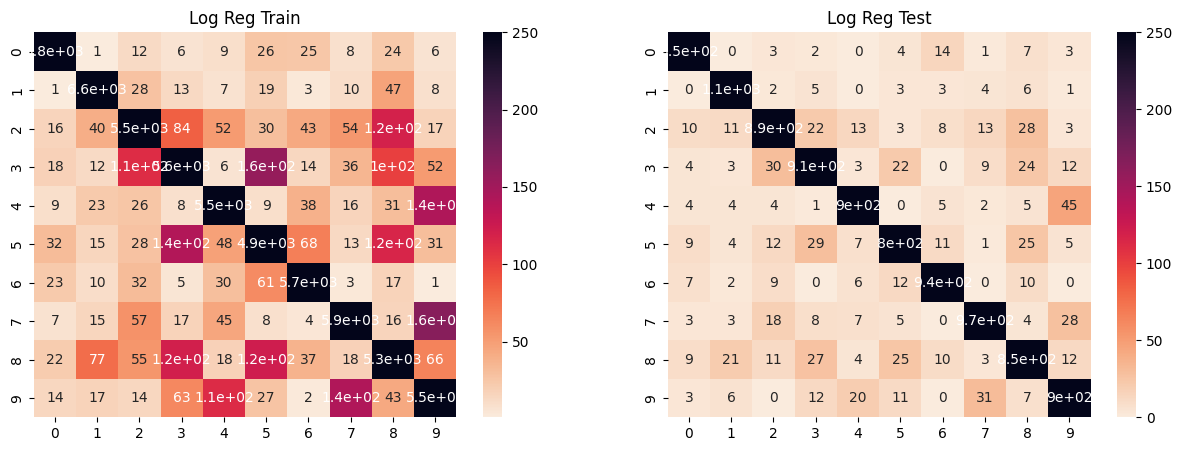

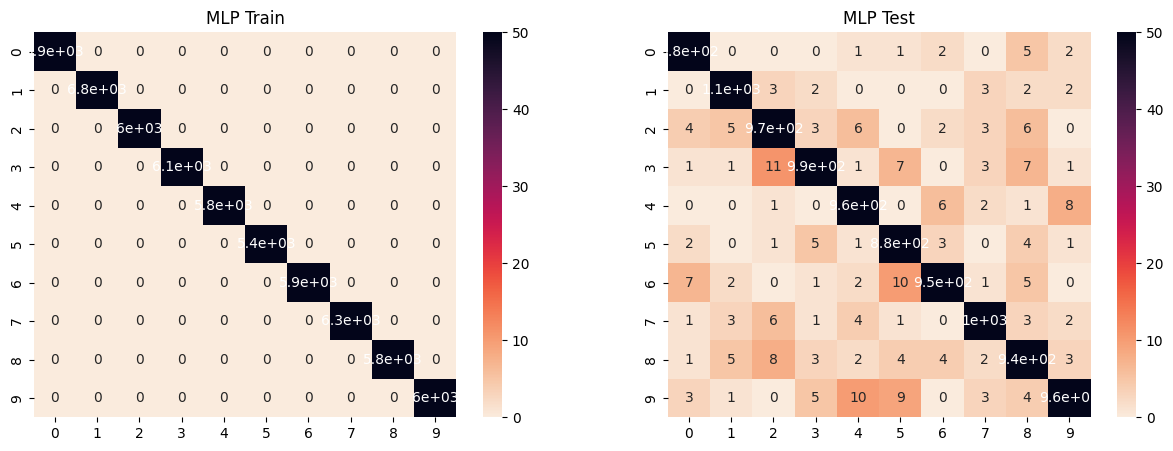

In [ ]:
## TODO 8: compute the confusion matrices both on train and test set for Logistic regression (trained on 60k)
# and MLP (trained on 60k). Use the function 'confusion_matrix_by_hand' that you wrote before

# Log Reg Confusion matrices
log_reg_CM_train, log_reg_CM_test = 0, 0
# YOUR CODE HERE

log_reg_CM_train = confusion_matrix_by_hand(y_train, log_reg.predict(x_train))
log_reg_CM_test = confusion_matrix_by_hand(y_test, log_reg.predict(x_test))

# mlp
mlp_CM_train, mlp_CM_test = 0, 0
# YOUR CODE HERE

mlp_CM_train = confusion_matrix_by_hand(y_train, best_mlp_large.predict(x_train))
mlp_CM_test = confusion_matrix_by_hand(y_test, best_mlp_large.predict(x_test))


# Convert confusion matrices to pandas data frames
labels = np.unique(y_test)
log_reg_CM_train_df = pd.DataFrame(log_reg_CM_train, index = labels, columns = labels)
log_reg_CM_test_df = pd.DataFrame(log_reg_CM_test, index = labels, columns = labels)

mlp_CM_train_df = pd.DataFrame(mlp_CM_train, index = labels, columns = labels)
mlp_CM_test_df = pd.DataFrame(mlp_CM_test, index = labels, columns = labels)

# Plot confusion matrices
fig, axes = plt.subplots(1,2, figsize=(15,5))
sn.heatmap(log_reg_CM_train_df, annot=True, ax=axes[0], cmap='rocket_r', vmax=250)
sn.heatmap(log_reg_CM_test_df, annot=True, ax=axes[1], cmap='rocket_r', vmax=250)
axes[0].set_title('Log Reg Train'), axes[1].set_title('Log Reg Test')

fig, axes = plt.subplots(1,2, figsize=(15,5))
sn.heatmap(mlp_CM_train_df, annot=True, ax=axes[0], cmap='rocket_r', vmax=50)
sn.heatmap(mlp_CM_test_df, annot=True, ax=axes[1], cmap='rocket_r', vmax=50)
axes[0].set_title('MLP Train'), axes[1].set_title('MLP Test')

In [ ]:
assert log_reg_CM_train.shape == (10, 10)
assert log_reg_CM_test.shape == (10, 10)
assert mlp_CM_train.shape == (10, 10)
assert mlp_CM_test.shape == (10, 10)


## TO DO 9
Compare and discuss:
- the computational time required to fit a SVM and a MLP. Which is faster as the number of data increase? Why? Can you apply both methods in the high data regime?
- the results from SVM m=7500 and NN with m=60000 training data points.
- the results from NN with m=500 and m=60000 training data points.
- What do you observe in the confusion matrices? Which are the hardest classes? Are the hardest and easiest classes the same both for mlp and logistic regression?

(Answer in the next cell, no need to write code)

Answers are provided according to the bullet points:

- As the data increases SVC fails to match up to the speed of MLP, the reason for this lies in how they're computed. SVC relies on solving a quadratic convex optimization problem plus the user of the kernel, in our case when we're applying the RBF this computes the distance for each pair of points which results in a $n$ *x* $n$ gram matrix ($O(n^2 . d)$ where d is the dimenionality of the data) plus the soltuion of the convex problem has an aditional cost of $O(n^2)$, leading to a total complexity of $O(n^2 . d)$ + $O(n^2)$ *whereas* when it comes to **MLP** we apply Stochastic Gradient Descent as our optimizer which process the data in mini-batches rather than the entire dataset which makes the computational cost scale linearly with the number of datapoints involved. When our dataset is not relatively large we can consume the SVC. 

- SVM with m=7500: 
    - Train Error: 0.0000
    - Test Error: 0
    
- NN with m=60000: 
    - Train Error: 0.0000
    - Test Error: 0.0235

- NN with m=500: 
    - Train Error: 0.0000
    - Test Error: 0.149655

- NN with m=60000: 
    - Train Error: 0.0000
    - Test Error: 0.0235

- When it comes to the confusion matrices comparison between **LogReg** and **MLP** the following can be stated: 
    - The first thing that stands out is that MLP performs extremely well in comparison to logistic regression in this setup, this is due to MLP being a non-linear classifier (due to the choosen acivation function, in our case ReLu) in comparison to logreg which is a linear classifier, and as our dataset is also non-linear, logreg is unable to capture this behaviour.
    - When it comes to the *hardest classes*, both the models tend to struggle with **4 vs. 9**, **8 vs. 5/6** **2 vs. 3**. The logreg model has more sever struggle as it can't find a linear boundry to seperate these classes in comparison to the non-linear one generated by MLP. The hardest and easiest classes are genreally the same when it comes to the two models, but MLP performs better on the harder classes to identify, for example **7 vs. 9**.  



## Data normalization

In the following the importance of data normalization is investigated. In particular, a MLP with a (50,50,) architecture and a 'logistic' activation function is trained with the original MNIST data and the effects are analized.

In [ ]:
# data are restored to their original scale
X = X*255.
print(X[1])

# train-test data split
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=m_t/len(Y), random_state=ID_number, stratify=Y)

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.  51. 159. 253. 159.  50.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  48. 238. 252. 252. 252. 237.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  54.
 227. 253. 252. 239. 233. 252.  57.   6.   0.   0.   0.   0.   0.   0.
   0. 

In [ ]:
best_mlp_large = MLPClassifier(hidden_layer_sizes=(50,50,), max_iter=max_iter, alpha=1e-4,activation='logistic', solver='sgd', tol=1e-4,
                               random_state=None, learning_rate_init=.1, verbose=True)
best_mlp_large.fit(x_train, y_train)
training_error = 1. - best_mlp_large.score(x_train, y_train)
test_error = 1. - best_mlp_large.score(x_test, y_test)


print ('\nRESULTS FOR BEST NN\n')

print (f"Best NN training error: {training_error:.4f}")
print (f"Best NN test error: {test_error:.4f}")

Iteration 1, loss = 1.10177085
Iteration 2, loss = 0.99045072
Iteration 3, loss = 1.03529094
Iteration 4, loss = 0.94903779
Iteration 5, loss = 0.95172441
Iteration 6, loss = 0.93283412
Iteration 7, loss = 0.94607495
Iteration 8, loss = 0.88324115
Iteration 9, loss = 0.78356861
Iteration 10, loss = 0.79266176
Iteration 11, loss = 0.79103397
Iteration 12, loss = 0.81319462
Iteration 13, loss = 0.79642342
Iteration 14, loss = 0.67622486
Iteration 15, loss = 0.72709351
Iteration 16, loss = 0.78628273
Iteration 17, loss = 0.73149185
Iteration 18, loss = 0.79584675
Iteration 19, loss = 0.83153911
Iteration 20, loss = 0.78624193
Iteration 21, loss = 0.78258057
Iteration 22, loss = 0.77607058
Iteration 23, loss = 0.78033351
Iteration 24, loss = 0.75251632
Iteration 25, loss = 0.70980674
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.

RESULTS FOR BEST NN

Best NN training error: 0.2188
Best NN test error: 0.2166


## TO DO 10

Do you think data normalization is important? Why? Do you observe any difference between the results you obtained before and after scaling the data?

(Answer in the next cell, no need to write code)

*Yes*, data normalization plays a key role, for the following reasons: 

- Without normalization we have vastly different ranges, for example one feature being in the range of 0-30 while another feature will be from 220 - 250, the variance here is quite large which makes the cost function distorted and slows down convergence making the model harder to train. 

- If the inputs have high variances, activations will go to one or the other end of the spectrum, some will shift towards zero (**vanishing gradients**) or some will explode. Normalization ensures that the **activations stay withing a reasonable range**. This is especially the case with the activation function that we're consuming currently which is 'logistic', with 'relu' the effects of normalization aren't so visible, one of the reasons for the same is that the risk of exploding gradients is minimized as 'relu' doesn't saturate for positive inputs. 

- When all features have similar scales the learning process is much smoother, unnormalized data may result in one feature dominating the gradients over the others, forcing the model to take smaller steps which further prolongs the training process. 

The results **before and after scaling** are significantly different, without scaling the performace is affected heavily and the model doesn't converge and stops at the 25th epoch as for 10 consecutive epochs the loss doesn't improve. Hence providing proof to the above stated reasons. 


## BONUS CONTENT (READ-ONLY)
The Homework is finished at this point, the following cells are read-only and optional.

Here you will see how Neural Networks (in this case Convolutional NNs) are actually implemented in practice. We will exploit the PyTorch library (see the docs here: https://pytorch.org/docs/stable/index.html) to implement a CNN to solve the same classification problem in the MNIST dataset that you have faced so far. Note that this is not the best possible implementation and it is also a sort of overkill for this particular problem. Nonetheless, understanding the following code can still be useful.

In [ ]:
!pip install torch

In [ ]:
# Import PyTorch
import torch
import torch.nn as nn
import torch.optim as optim

# Re-download, preprocess and split the dataset
X,Y = fetch_openml('mnist_784', version=1, return_X_y=True,as_frame = False)
X = (X / 255. - 0.5) / 0.5
m_t = 60000
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=m_t/len(Y), random_state=ID_number, stratify=Y)

# Convert numpy arrays to PyTorch tensors
x_train = torch.tensor(x_train.astype(np.float32)).unsqueeze(dim=-1).unsqueeze(dim=-1).view(-1, 1, 28, 28)
x_test = torch.tensor(x_test.astype(np.float32)).unsqueeze(dim=-1).unsqueeze(dim=-1).view(-1, 1, 28, 28)

y_train = torch.tensor(y_train.astype(int))
y_test = torch.tensor(y_test.astype(int))

In [ ]:
# Define the Convolutional Neural Network layer by layer and implement the forward pass
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.pool = nn.MaxPool2d(kernel_size=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(64 * 5 * 5, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = self.pool(x)
        x = torch.relu(self.conv2(x))
        x = self.pool(x)
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Check if we can run our experiment on a GPU (much faster)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)

# Define the loss function and the optimizer (Adam docs: https://pytorch.org/docs/stable/generated/torch.optim.Adam.html)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
n_epochs = 10000
for epoch in range(n_epochs):
    model.train()
    indexes = np.random.randint(0, high=x_train.shape[0], size=64)
    x_batch = x_train[indexes].to(device)
    y_batch = y_train[indexes].to(device)

    optimizer.zero_grad()

    outputs = model(x_batch)
    loss = criterion(outputs, y_batch)

    loss.backward()
    optimizer.step()

    running_loss = loss.item()
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}/{n_epochs}, Loss: {running_loss:.4f}")

# Evaluate the model
model.eval()
outputs = model(x_test.to(device))
_, predicted = torch.max(outputs, 1)
total = y_test.shape[0]
correct = (predicted == y_test).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

Epoch 0/10000, Loss: 2.3063
Epoch 1000/10000, Loss: 0.0692
Epoch 2000/10000, Loss: 0.0056
Epoch 3000/10000, Loss: 0.0408
Epoch 4000/10000, Loss: 0.0138
Epoch 5000/10000, Loss: 0.0019
Epoch 6000/10000, Loss: 0.0005
Epoch 7000/10000, Loss: 0.0607
Epoch 8000/10000, Loss: 0.0384
Epoch 9000/10000, Loss: 0.0013
Test Accuracy: 99.04%
